<a href="https://colab.research.google.com/github/DanielMerkdo/analitica_salud/blob/main/b_exploracion_limpieza_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación del notebook

## Conexion BD

In [1]:
# Montar drive y crear path para sys y para directorio de trabajo

from google.colab import drive
drive.mount('/content/drive')

import sys
import os

# Define el path al directorio de trabajo actual
path = "/content/drive/My Drive/cod/analitica_salud"


sys.path.append(path) ### para importar archivo de funciones propias a través de import

os.chdir(path) ### para que por defecto suba y descargue archivos partiendo de esa ruta

Mounted at /content/drive


## Cargar librerías

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import math
import statsmodels.api as sm

from sklearn.linear_model import LassoCV
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from scipy.stats import zscore, shapiro, kstest, anderson
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import a_funciones as funciones     # Importar las funciones
import importlib
importlib.reload(funciones)

<module 'a_funciones' from '/content/drive/MyDrive/cod/analitica_salud/a_funciones.py'>

In [4]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.3 MB/s eta 0:00:00


## Descarga de las bases de datos en el notebook

In [5]:
import pandas as pd
df = pd.read_csv('data/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Exploración de los datos

## Limpieza y Transformacion

In [6]:
salud_df=df.copy()

In [7]:
salud_df.shape

(70000, 13)

Se evidencian 13 variables y 70000 registros

In [8]:
####################################################################
# Información del tipo de variables #
####################################################################
salud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
# Variables del dataset:
#
# id            | Identificador               | id         | int – número identificador del paciente
# age           | Variable objetiva           | age        | int (días) – edad en días
# gender        | Variable objetiva           | gender     | categórica – 1: mujer, 2: hombre
# height        | Variable objetiva           | height     | int (cm) – estatura en centímetros
# weight        | Variable objetiva           | weight     | float (kg) – peso en kilogramos
# ap_hi         | Variable de examen físico   | ap_hi      | int – presión arterial sistólica
# ap_lo         | Variable de examen físico   | ap_lo      | int – presión arterial diastólica
# cholesterol   | Variable de examen físico   | cholesterol| categórica – 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal
# gluc          | Variable de examen físico   | gluc       | categórica – 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal
# smoke         | Variable subjetiva          | smoke      | binaria – si el paciente fuma o no
# alco          | Variable subjetiva          | alco       | binaria – si el paciente consume alcohol
# active        | Variable subjetiva          | active     | binaria – si el paciente realiza actividad física
# cardio        | Variable objetivo (target)  | cardio     | binaria – presencia o ausencia de enfermedad cardiovascular


In [10]:
salud_df.dtypes

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


In [11]:
###############################################
 #Se determino eliminar la columna Id ya que no aparta para el modelo#
###############################################
salud_df.drop(columns=['id'],axis=1,inplace=True)  # Drop elimina la columna de forma permanente

#convertir la columna de edad en dias a  edad pero en años
salud_df['age'] = (salud_df['age'] / 365).astype(int)

salud_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [12]:
####################################################################
# Transformaciones de columnas #
###################################################################
#Las variables cholesterol, gluc, smoke, alcohol, active y cardio realmente son variables categóricas, se realiza su transformación


In [13]:
salud_df["gender"] = salud_df["gender"].astype("object") # 1 - women, 2 - men
salud_df["cholesterol"] = salud_df["cholesterol"].astype("object") # 1: normal, 2: above normal, 3: well above normal
salud_df["gluc"] = salud_df["gluc"].astype("object") # 1: normal, 2: above normal, 3: well above normal
salud_df["smoke"] = salud_df["smoke"].astype("object") # Si el paciente fuma o no
salud_df["alco"] = salud_df["alco"].astype("object") # Si el paciente consume alcohol o no
salud_df["active"] = salud_df["active"].astype("object") # Si el paciente realiza actividad física o no
salud_df["cardio"] = salud_df["cardio"].astype("object") #Si el paciente presenta enfermedad cardíaca o no


In [14]:
salud_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [15]:
salud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  object 
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  object 
 7   gluc         70000 non-null  object 
 8   smoke        70000 non-null  object 
 9   alco         70000 non-null  object 
 10  active       70000 non-null  object 
 11  cardio       70000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 6.4+ MB


In [16]:
salud_df.isnull().sum()

,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


No se evidencian registros nulos

In [17]:
salud_df.duplicated().sum()

np.int64(3208)

No se evidencian registros duplicados

## Análisis variables númericas

### Analisis Univariado

In [18]:
numericas = salud_df.select_dtypes(include=[np.number])
numericas.describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,164.359229,74.205690,128.817286,96.630414
std,6.766774,8.210126,14.395757,154.011419,188.472530
min,29.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000


Las columnas de altura y peso evidencian que la altura mínima es de 55 cm y el peso mínimo es de 10 kg, esto es incoherente ya que la edad mínima es de que equivale a 29 años. Por otro lado, la altura máxima es de 250 cm y el peso máximo es de 200 kg, lo cual podría no ser representativo al generalizar los datos.

Los valores negativos en ap_hi y ap_lo (por ejemplo, -150 o -70) son imposibles para la presión arterial y reflejan errores en la captura de datos. Estos valores deben ser considerados outliers y eliminados o corregidos, ya que afectan la calidad del análisis y pueden distorsionar los resultados.

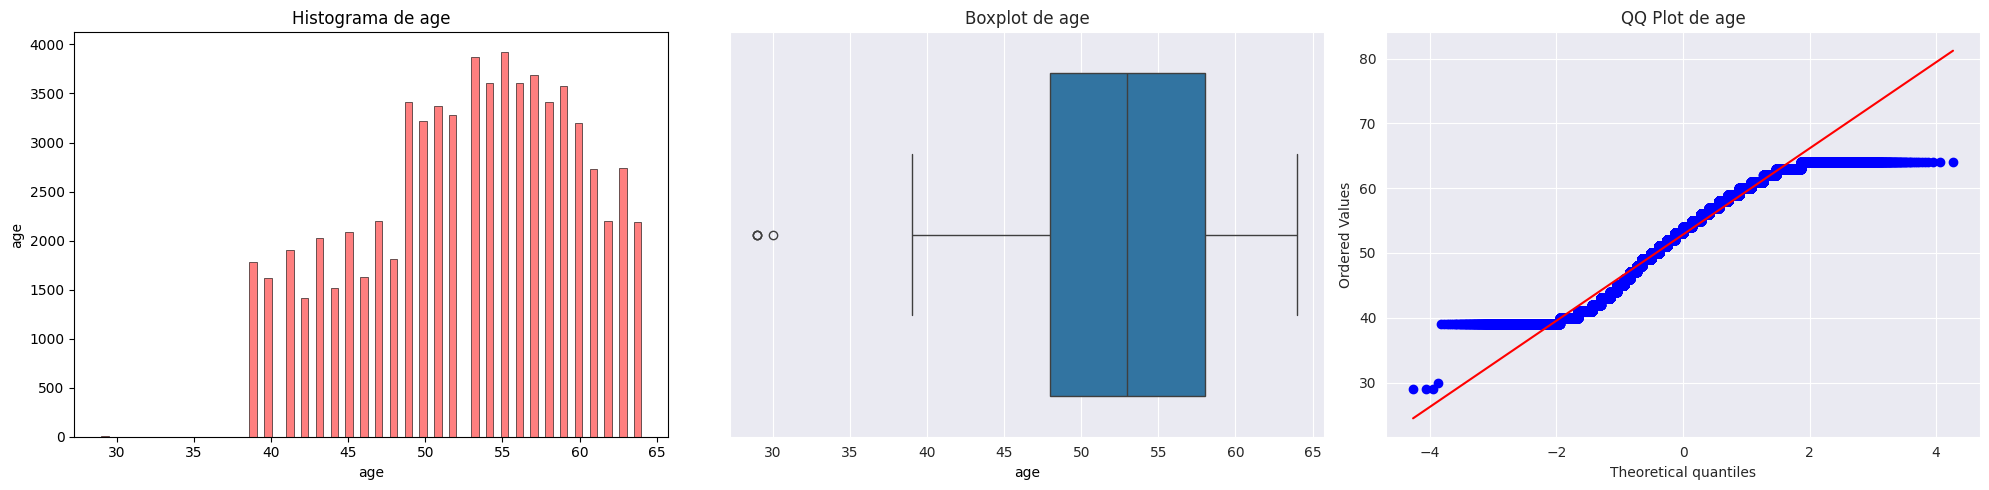

In [19]:
################################################################
# Gráfica para las columna edad #
################################################################

funciones.crear_graficos(salud_df,'age')

* Análisis exploratorio de la variable 'age':
- El histograma muestra una distribución aproximadamente simétrica pero ligeramente sesgada a la izquierda, con mayor densidad entre los 50 y 60 años, lo que indica una población mayoritariamente adulta.
- El boxplot evidencia unos pocos outliers por debajo de los 35 años, pero en general la distribución es compacta.
- El QQ plot muestra una desviación de la normalidad, especialmente en las colas (extremos), aunque la parte central sigue razonablemente la línea teórica.

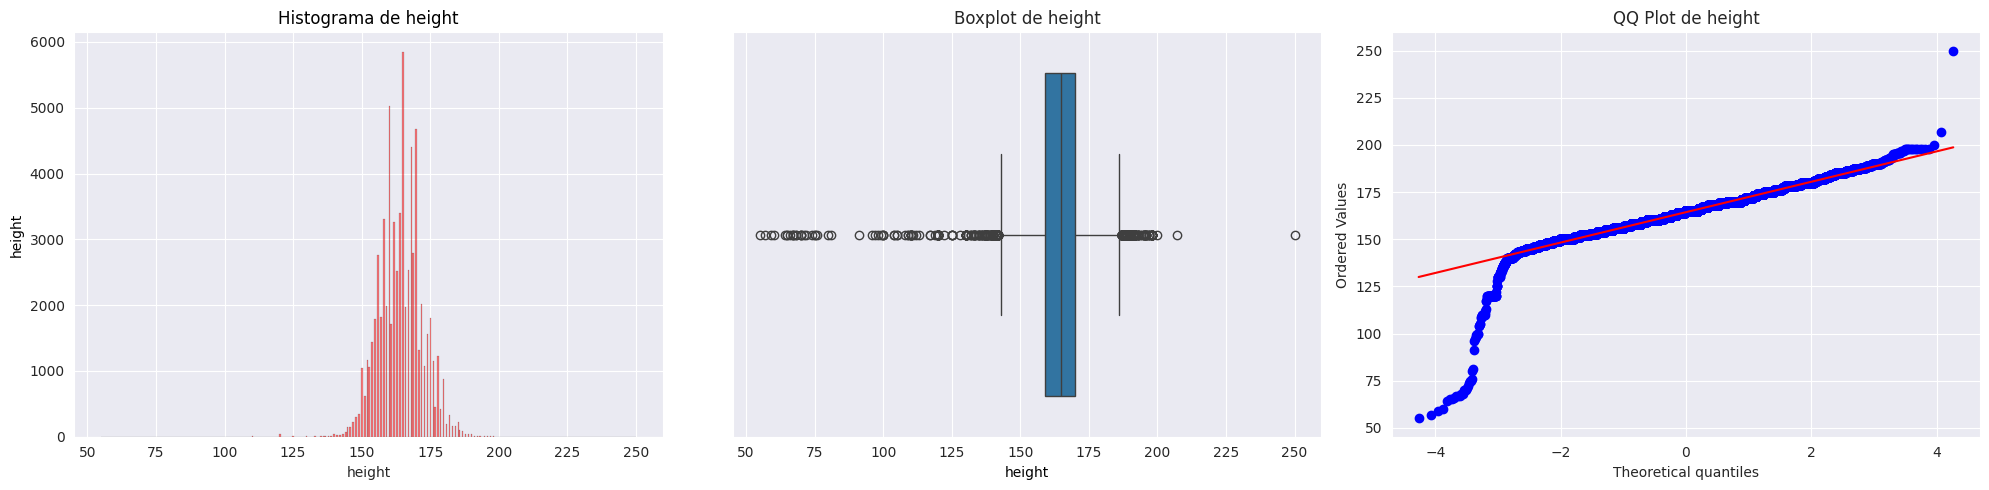

In [20]:
################################################################
# Gráfica para las columna altura
################################################################

funciones.crear_graficos(salud_df,'height')

* Análisis exploratorio de la variable 'height':
- El histograma muestra una distribución aproximadamente normal con un leve sesgo a la izquierda.
- El boxplot indica que la mayoría de los valores están entre aproximadamente 150 y 185 cm, aunque hay numerosos outliers en ambos extremos, especialmente por debajo de 130 cm y por encima de 200 cm.
- El QQ plot confirma que la distribución no es perfectamente normal, con fuertes desviaciones en ambas colas, lo cual indica la presencia de valores atípicos extremos.


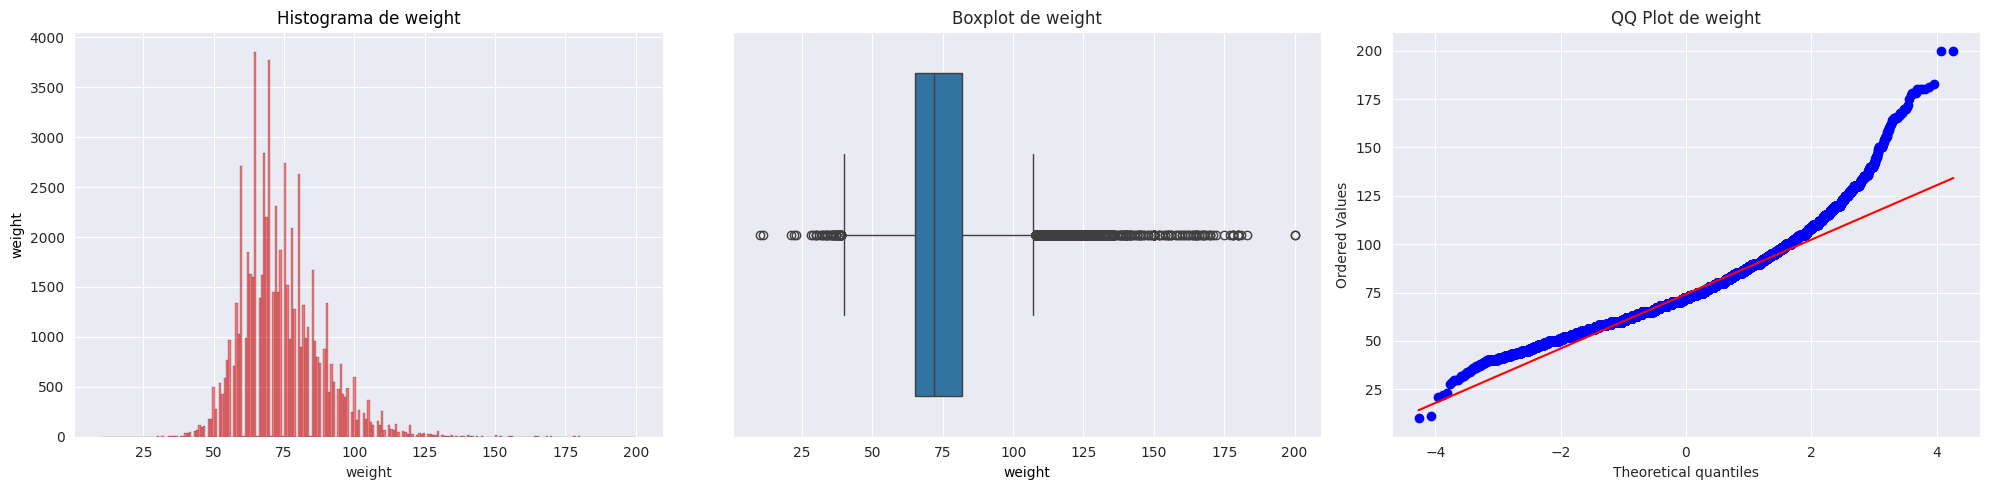

In [21]:
################################################################
# Gráfica para las columna peso #
################################################################

funciones.crear_graficos(salud_df,'weight')

* Análisis exploratorio de la variable 'weight':
- El histograma revela una distribución asimétrica positiva (sesgo a la derecha), con una alta concentración entre 50 y 90 kg.
- El boxplot muestra varios outliers hacia los extremos, especialmente por encima de los 100 kg.
- El QQ plot evidencia desviaciones notables de la normalidad, especialmente en ambas colas, lo que confirma la presencia de valores extremos.

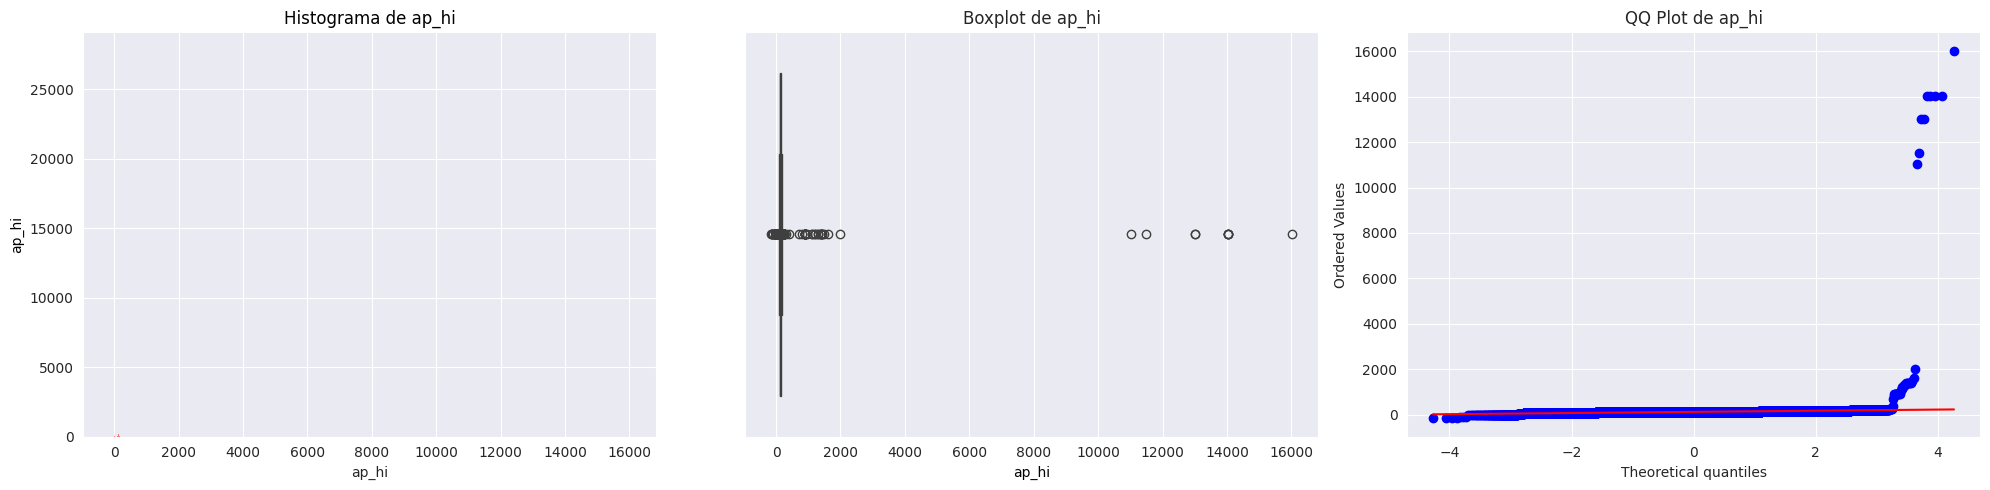

In [22]:
################################################################
# Gráfica para la columna Presión arterial sistólica #
################################################################

funciones.crear_graficos(salud_df,'ap_hi')

Se evidencia que los datos pueden estar erroneos ya que no se presenta algun comportamiento en las graficas.

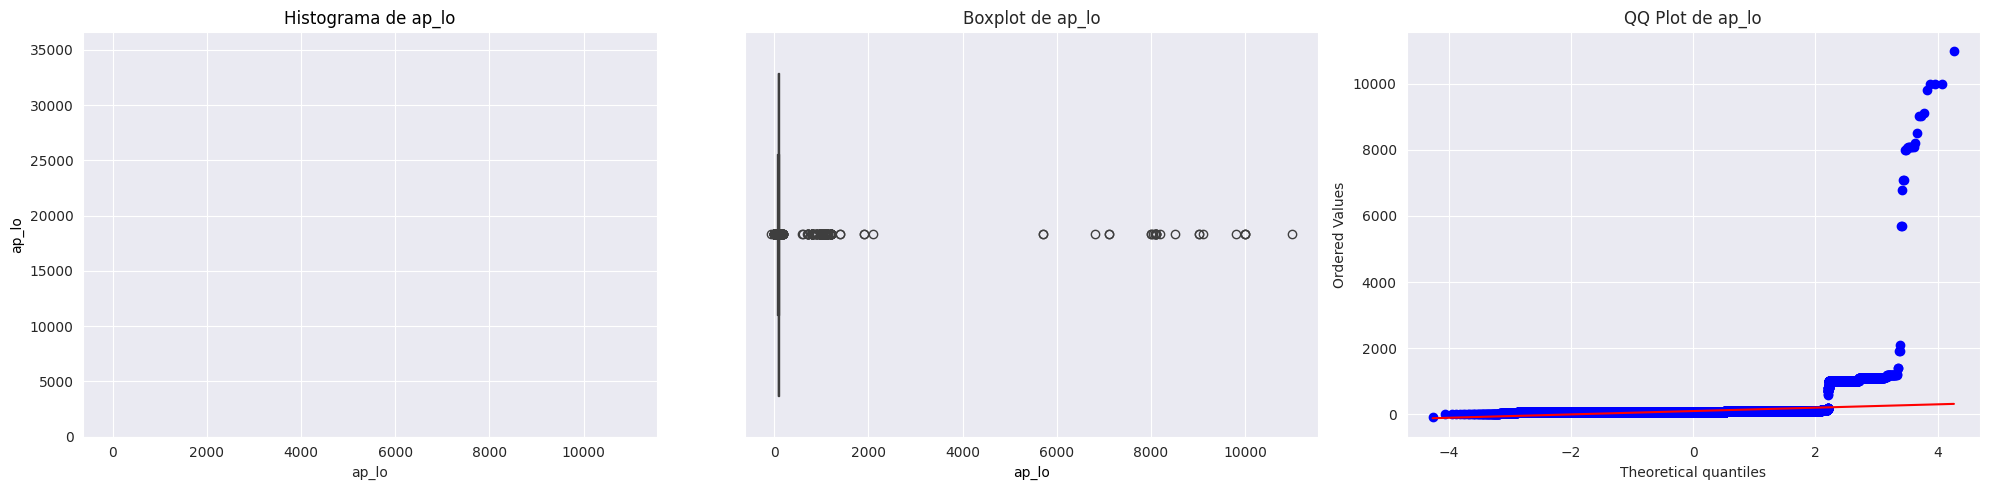

In [23]:
################################################################
# Gráfica para la columna Presión arterial diastolica #
################################################################

funciones.crear_graficos(salud_df,'ap_lo')

Se evidencia que los datos pueden estar erroneos ya que no se presenta algun comportamiento en las graficas.

### Datos Atípicos

In [24]:
# Lista de variables numéricas
variables_numericas = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for var in variables_numericas:
    print("#######################################################################")
    print(f"# Detección de outliers usando IQR en la variable: {var}")
    print("#######################################################################")

    data = salud_df[var]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detectar outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    print(f"Número de outliers detectados en {var}: {len(outliers)}")
    print(f"Valores mínimos fuera de rango: {outliers.min()}")
    print(f"Valores máximos fuera de rango: {outliers.max()}")
    print()


#######################################################################
# Detección de outliers usando IQR en la variable: age
#######################################################################
Número de outliers detectados en age: 4
Valores mínimos fuera de rango: 29
Valores máximos fuera de rango: 30

#######################################################################
# Detección de outliers usando IQR en la variable: height
#######################################################################
Número de outliers detectados en height: 519
Valores mínimos fuera de rango: 55
Valores máximos fuera de rango: 250

#######################################################################
# Detección de outliers usando IQR en la variable: weight
#######################################################################
Número de outliers detectados en weight: 1819
Valores mínimos fuera de rango: 10.0
Valores máximos fuera de rango: 200.0

###############################################

### Eliminacion Atipicos

Se eliminan para altura y peso los valores que caen por debajo del percentil 2.5% y por encima del 97.5%, es decir, se descarta el 5% más extremo de los datos (2.5% en cada cola). Esto permite eliminar outliers muy alejados sin perder la mayoría representativa del conjunto, mejorando la precisión del análisis.

In [25]:
# Filtrar índices donde height está fuera del rango
idx_height = salud_df[(salud_df['height'] > salud_df['height'].quantile(0.975)) |
                      (salud_df['height'] < salud_df['height'].quantile(0.025))].index

# Filtrar índices donde weight está fuera del rango
idx_weight = salud_df[(salud_df['weight'] > salud_df['weight'].quantile(0.975)) |
                      (salud_df['weight'] < salud_df['weight'].quantile(0.025))].index

# Unir índices para eliminar sin duplicados
idx_to_drop = idx_height.union(idx_weight)

# Eliminar filas del DataFrame
salud_df.drop(idx_to_drop, inplace=True)

In [26]:
salud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64352 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          64352 non-null  int64  
 1   gender       64352 non-null  object 
 2   height       64352 non-null  int64  
 3   weight       64352 non-null  float64
 4   ap_hi        64352 non-null  int64  
 5   ap_lo        64352 non-null  int64  
 6   cholesterol  64352 non-null  object 
 7   gluc         64352 non-null  object 
 8   smoke        64352 non-null  object 
 9   alco         64352 non-null  object 
 10  active       64352 non-null  object 
 11  cardio       64352 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 6.4+ MB


La presión arterial sistólica (ap_hi) debe ser siempre mayor o igual que la diastólica (ap_lo). Si ap_lo > ap_hi, es un error o dato inconsistente. Ademas la presión arterial no puede ser negativa

In [27]:
inaccurate_bp = salud_df[salud_df['ap_lo'] > salud_df['ap_hi']]
print(f"Número de registros con presión diastólica mayor que sistólica: {len(inaccurate_bp)}")

Número de registros con presión diastólica mayor que sistólica: 1093


In [28]:
#Filtrar registros válidos para presión arterial (sin valores extremos, negativos ni inconsistencias)
salud_df = salud_df[
    (salud_df['ap_hi'] >= salud_df['ap_hi'].quantile(0.025)) &
    (salud_df['ap_hi'] <= salud_df['ap_hi'].quantile(0.975)) &
    (salud_df['ap_lo'] >= salud_df['ap_lo'].quantile(0.025)) &
    (salud_df['ap_lo'] <= salud_df['ap_lo'].quantile(0.975)) &
    (salud_df['ap_hi'] >= 0) &
    (salud_df['ap_lo'] >= 0) &
    (salud_df['ap_hi'] >= salud_df['ap_lo'])
]

# 4. Reiniciar el índice
salud_df.reset_index(drop=True, inplace=True)


In [29]:
salud_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60602,53,1,172,70.0,130,90,1,1,0,0,1,1
60603,57,1,165,80.0,150,80,1,1,0,0,1,1
60604,52,2,168,76.0,120,80,1,1,1,0,1,0
60605,61,1,163,72.0,135,80,1,2,0,0,0,1


In [30]:
numericas2 = salud_df.select_dtypes(include=[np.number])
numericas2.describe()

,age,height,weight,ap_hi,ap_lo
count,60607.000000,60607.000000,60607.000000,60607.000000,60607.000000
mean,52.840398,164.540565,73.466799,125.798142,81.054367
std,6.747074,6.839573,11.823669,13.809238,8.256202
min,29.000000,150.000000,51.000000,100.000000,60.000000
25%,48.000000,160.000000,65.000000,120.000000,80.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,169.000000,80.000000,135.000000,90.000000
max,64.000000,180.000000,108.000000,165.000000,100.000000


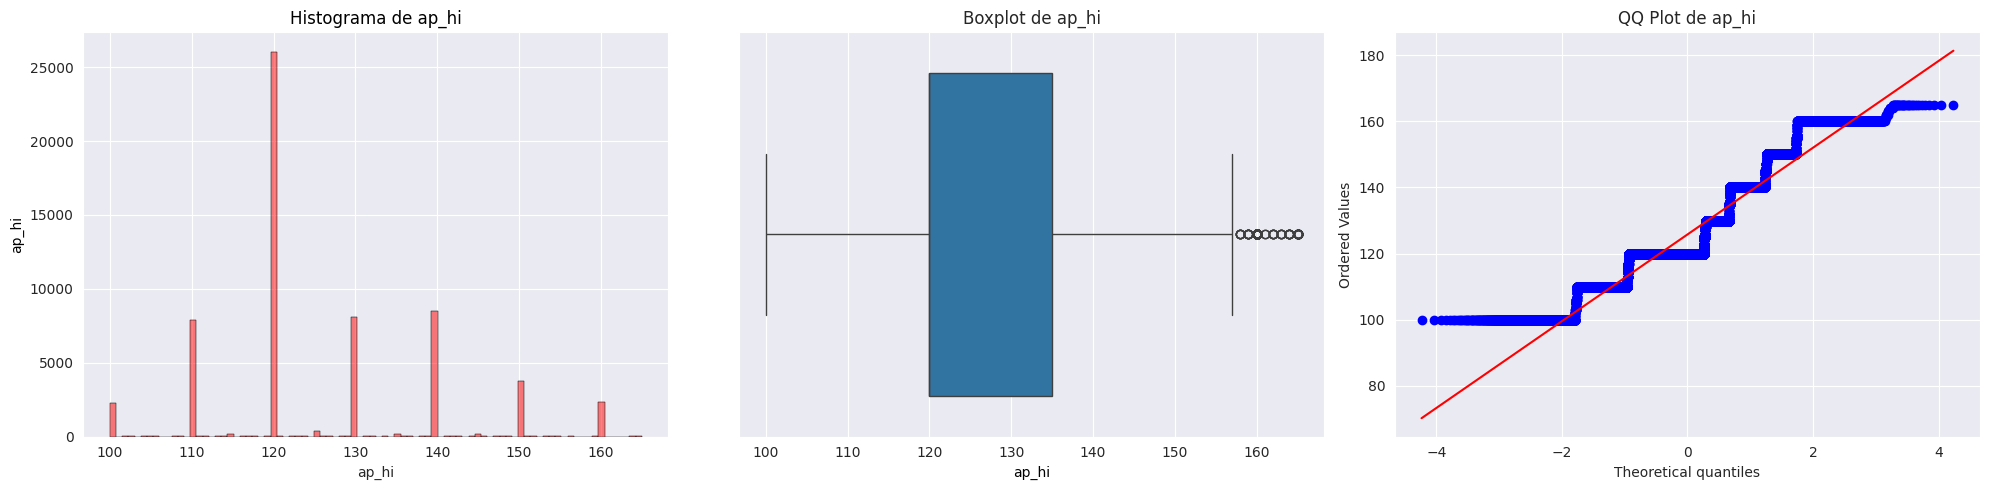

In [31]:
funciones.crear_graficos(salud_df,'ap_hi')

Despues de la limpieza se evidencian mejores resultados

- El histograma muestra una fuerte concentración de valores en 120, con picos adicionales en múltiplos de 10, lo que sugiere redondeo manual o entrada de datos artificial.
- El boxplot indica presencia de outliers hacia valores superiores, aunque la mayoría de los datos se concentra en un rango razonable.
- El QQ plot evidencia una clara desviación de la normalidad, especialmente en los extremos (colas).
Conclusión: la variable 'ap_hi' no sigue una distribución normal y presenta valores atípicos significativos, por lo que se recomienda aplicar técnicas de transformación o limpieza para mejorar su uso en modelos predictivos.

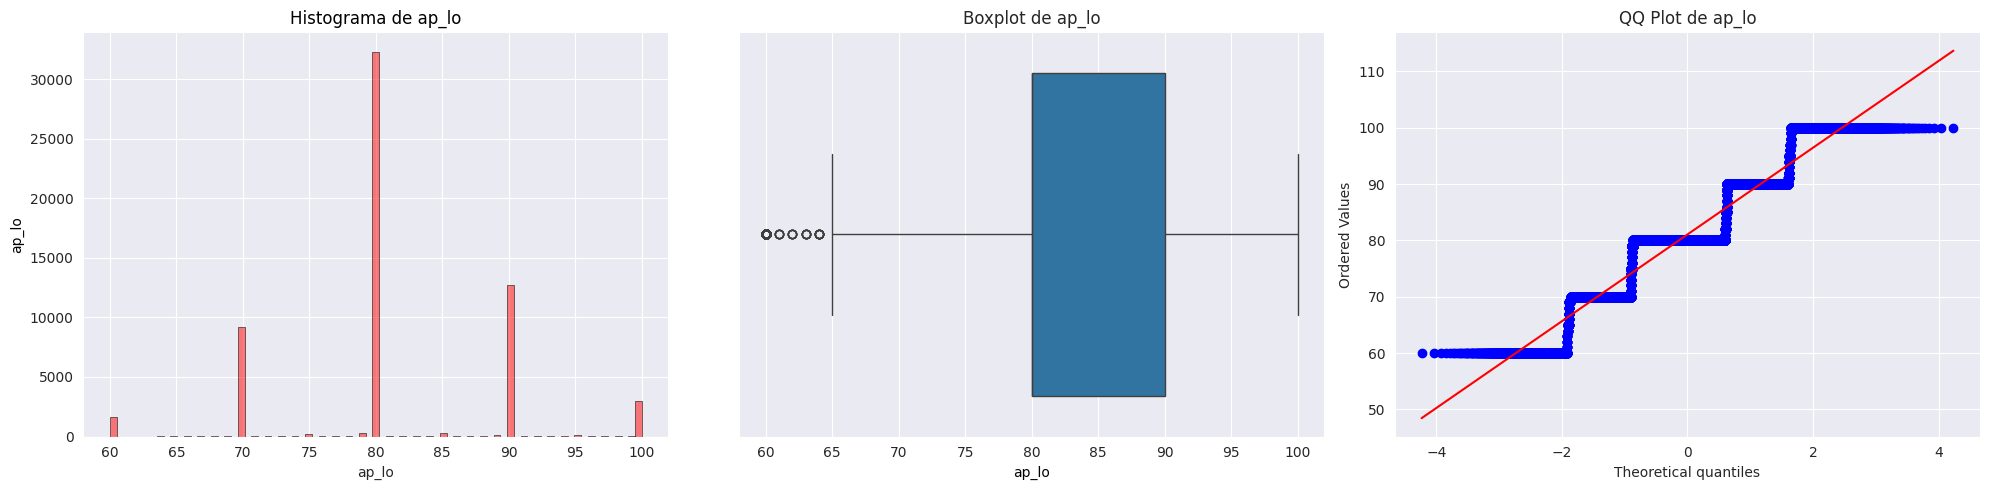

In [ ]:
funciones.crear_graficos(salud_df,'ap_lo')

# HISTOGRAMA
* El histograma muestra una distribución discreta con valores agrupados principalmente en ciertos puntos (como 60, 70, 80, 90 y 100).
* El valor de 80 es claramente el más común.

#BOXPLOT
* La mediana parece estar cerca de 80-90, con un rango intercuartílico amplio.
* Hay valores atípicos a la izquierda (menores a 65), posiblemente clínicamente inusuales o errores de entrada.

QQPlot
* Los puntos se desvían considerablemente de la línea roja (la diagonal teórica), lo que confirma que los datos no siguen una distribución normal.

### Pruebas de Normalidad

In [32]:
# Aplicar la prueba de Shapiro-Wilk a cada variable
# Aunque solo es recomendable para muestras pequeñas, se realiza a modo de verificación se tendran en cuenta las  Pruebas de
# Kolmogorov y de Anderson Darlin

for variable in numericas:
    print(f'\nPrueba de Shapiro-Wilk para variable - {variable}:')
    stat, p_value = shapiro(numericas[variable])
    print('Estadístico=%.3f, p-valor=%.6f' % (stat, p_value))
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula, la variable sigue una distribución normal.")
    else:
        print("Se rechaza la hipótesis nula, la variable no sigue una distribución normal.")


Prueba de Shapiro-Wilk para variable - age:
Estadístico=0.965, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.

Prueba de Shapiro-Wilk para variable - height:
Estadístico=0.963, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.

Prueba de Shapiro-Wilk para variable - weight:
Estadístico=0.954, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.

Prueba de Shapiro-Wilk para variable - ap_hi:
Estadístico=0.027, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.

Prueba de Shapiro-Wilk para variable - ap_lo:
Estadístico=0.073, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 70000.
  res = hypotest_fun_out(*samples, **kwds)


In [33]:
# Prueba de Kolmogorov-Smirnov
for variable in numericas:
    print(f'\nPrueba de Kolmogorov-Smirnov para {variable}:')
    stat, p_value = kstest(numericas[variable], 'norm')
    print('Estadístico=%.3f, p-valor=%.6f' % (stat, p_value))
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula: la variable sigue una distribución normal.")
    else:
        print("Se rechaza la hipótesis nula: la variable no sigue una distribución normal.")


Prueba de Kolmogorov-Smirnov para age:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.

Prueba de Kolmogorov-Smirnov para height:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.

Prueba de Kolmogorov-Smirnov para weight:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.

Prueba de Kolmogorov-Smirnov para ap_hi:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.

Prueba de Kolmogorov-Smirnov para ap_lo:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.


In [34]:
# Prueba de Anderson-Darling
for variable in numericas:
    print(f'\nPrueba de Anderson-Darling para {variable}:')
    result = anderson(numericas[variable], dist='norm')
    print('Estadístico=%.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        print('Nivel de significancia=%.1f%%: estadístico crítico=%.3f' % (result.significance_level[i], result.critical_values[i]))
        if result.statistic < result.critical_values[i]:
            print(f'\n La variable {variable}: sigue una distribución normal')
        else:
            print(f'\n La variable "{variable}"no sigue una distribución normal')


Prueba de Anderson-Darling para age:
Estadístico=548.185
Nivel de significancia=15.0%: estadístico crítico=0.576

 La variable "age"no sigue una distribución normal
Nivel de significancia=10.0%: estadístico crítico=0.656

 La variable "age"no sigue una distribución normal
Nivel de significancia=5.0%: estadístico crítico=0.787

 La variable "age"no sigue una distribución normal
Nivel de significancia=2.5%: estadístico crítico=0.918

 La variable "age"no sigue una distribución normal
Nivel de significancia=1.0%: estadístico crítico=1.092

 La variable "age"no sigue una distribución normal

Prueba de Anderson-Darling para height:
Estadístico=130.665
Nivel de significancia=15.0%: estadístico crítico=0.576

 La variable "height"no sigue una distribución normal
Nivel de significancia=10.0%: estadístico crítico=0.656

 La variable "height"no sigue una distribución normal
Nivel de significancia=5.0%: estadístico crítico=0.787

 La variable "height"no sigue una distribución normal
Nivel de sig

### Analisis Multicolinealidad

In [35]:
# Seleccionamos las variables numéricas del dataframe df_salud
X = salud_df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]

# Agregamos una constante para el modelo (requerido por VIF)
X = sm.add_constant(X)

# Calculamos el VIF para cada variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostramos los resultados
print("###########################################")
print("# Análisis de Multicolinealidad (VIF)     #")
print("###########################################")
print(vif_data)

###########################################
# Análisis de Multicolinealidad (VIF)     #
###########################################
  Variable         VIF
0    const  757.901043
1      age    1.052129
2   height    1.081295
3   weight    1.141841
4    ap_hi    2.014314
5    ap_lo    1.952591


* Análisis de Multicolinealidad (VIF):
* Se calcularon los valores del Factor de Inflación de la Varianza (VIF) para detectar posibles problemas de colinealidad entre las variables independientes.
*  Los resultados muestran que todas las variables (excepto la constante) tienen VIF menores a 5, lo que indica que no existe multicolinealidad severa.
* En particular, 'ap_hi' y 'ap_lo' presentan una leve colinealidad, como es esperable por su relación clínica, pero sus VIF (2.01 y 1.95) están dentro de rangos aceptables.
* Por tanto, se considera que las variables pueden ser incluidas en el modelo sin riesgo de distorsión por colinealidad.

### Analisis Bivariado

In [36]:
######################################################################################
# Tabla de la correlacción de las variables númericas del curso de álgebra vectorial #
######################################################################################
correlation_matrix = numericas.corr()
correlation_matrix

,age,height,weight,ap_hi,ap_lo
age,1.000000,-0.081506,0.053561,0.020854,0.017620
height,-0.081506,1.000000,0.290968,0.005488,0.006150
weight,0.053561,0.290968,1.000000,0.030702,0.043710
ap_hi,0.020854,0.005488,0.030702,1.000000,0.016086
ap_lo,0.017620,0.006150,0.043710,0.016086,1.000000


Text(77.78159722222227, 0.5, 'Variables')

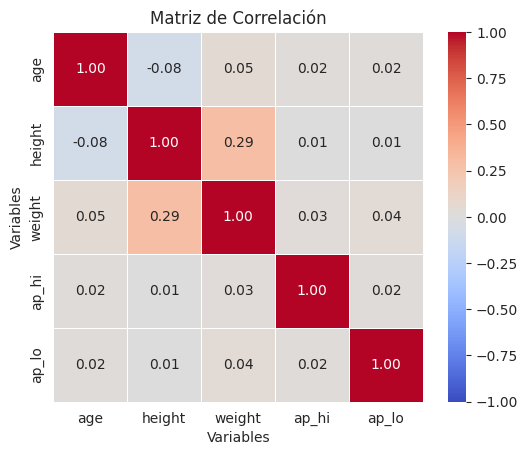

In [37]:
########################################################################################
# Gráfica de la correlacción de las variables númericas del curso de álgebra vectorial #
########################################################################################
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, square=True)

# Agregar título y etiquetas
plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')


* Análisis de Correlación:
*Se generó una matriz de correlación para evaluar la relación lineal entre las variables numéricas del conjunto de datos.
* Los resultados muestran que no existen correlaciones fuertes entre las variables (todas las correlaciones son < 0.30).
* La mayor correlación observada es entre 'height' y 'weight' (0.29), lo cual es esperable desde el punto de vista fisiológico.
*  Las variables 'ap_hi' y 'ap_lo' tienen muy baja correlación entre sí (0.02), lo que confirma los resultados del VIF.
* En general, no se identifican relaciones lineales fuertes que puedan afectar negativamente el rendimiento de modelos de regresión.

## Analisis variables categóricas

### Analisis Univariado

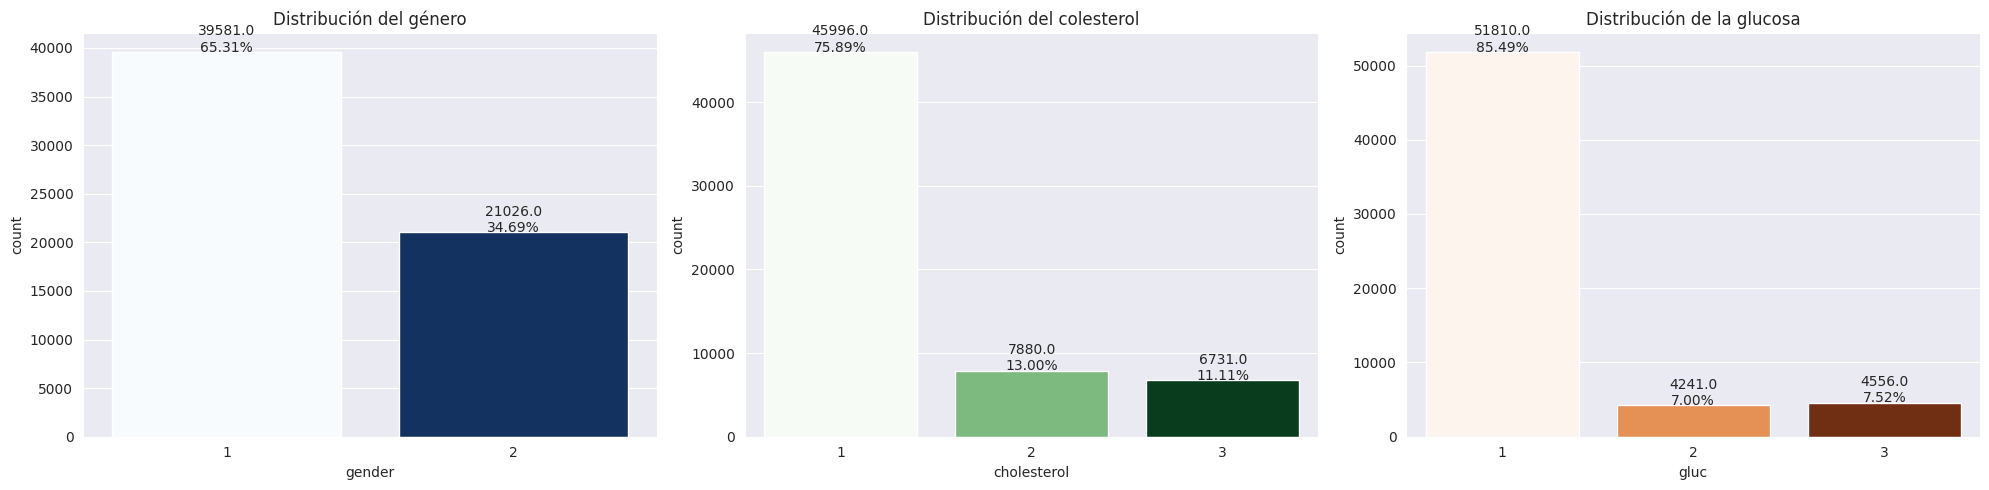

In [38]:
fig, gra = plt.subplots(ncols=3, figsize=(20, 5))


# Gráfico para 'gender'
sns.countplot(x='gender', data=salud_df, ax=gra[0],hue="gender" ,palette='Blues', legend=False)
gra[0].set_title('Distribución del género')
funciones.agregar_etiquetas_con_ratio(gra[0], salud_df['gender'])

# Gráfico para 'cholesterol"
sns.countplot(x='cholesterol', data=salud_df, ax=gra[1], hue="cholesterol",palette='Greens',legend=False)
gra[1].set_title('Distribución del colesterol')
funciones.agregar_etiquetas_con_ratio(gra[1], salud_df['cholesterol'])

# Gráfico para glucosa
sns.countplot(x='gluc', data=salud_df, ax=gra[2], hue="gluc",palette='Oranges', legend=False)
gra[2].set_title('Distribución de la glucosa')
funciones.agregar_etiquetas_con_ratio(gra[2], salud_df['gluc'])

plt.tight_layout()
plt.show()


* Análisis de Distribuciones Categóricas:
* Se generaron gráficos de barras para visualizar la distribución de las variables categóricas: 'gender', 'cholesterol' y 'gluc' (glucosa).
 - 'gender': La mayoría de los registros corresponde a la categoría 1 (65.31%), frente a un 34.69% de la categoría 2, lo que indica un leve desbalance de género.
 - 'cholesterol': El 75.89% de los pacientes tienen colesterol normal (categoría 1), mientras que el 13.00% y 11.11% presentan niveles elevados (categorías 2 y 3 respectivamente).
 - 'gluc': La mayoría (85.49%) presenta niveles normales de glucosa, mientras que solo un 14.51% muestra niveles elevados (categorías 2 y 3).
* Estas distribuciones indican un predominio de pacientes con niveles normales en colesterol y glucosa, lo que puede influir en el comportamiento de los modelos predictivos.


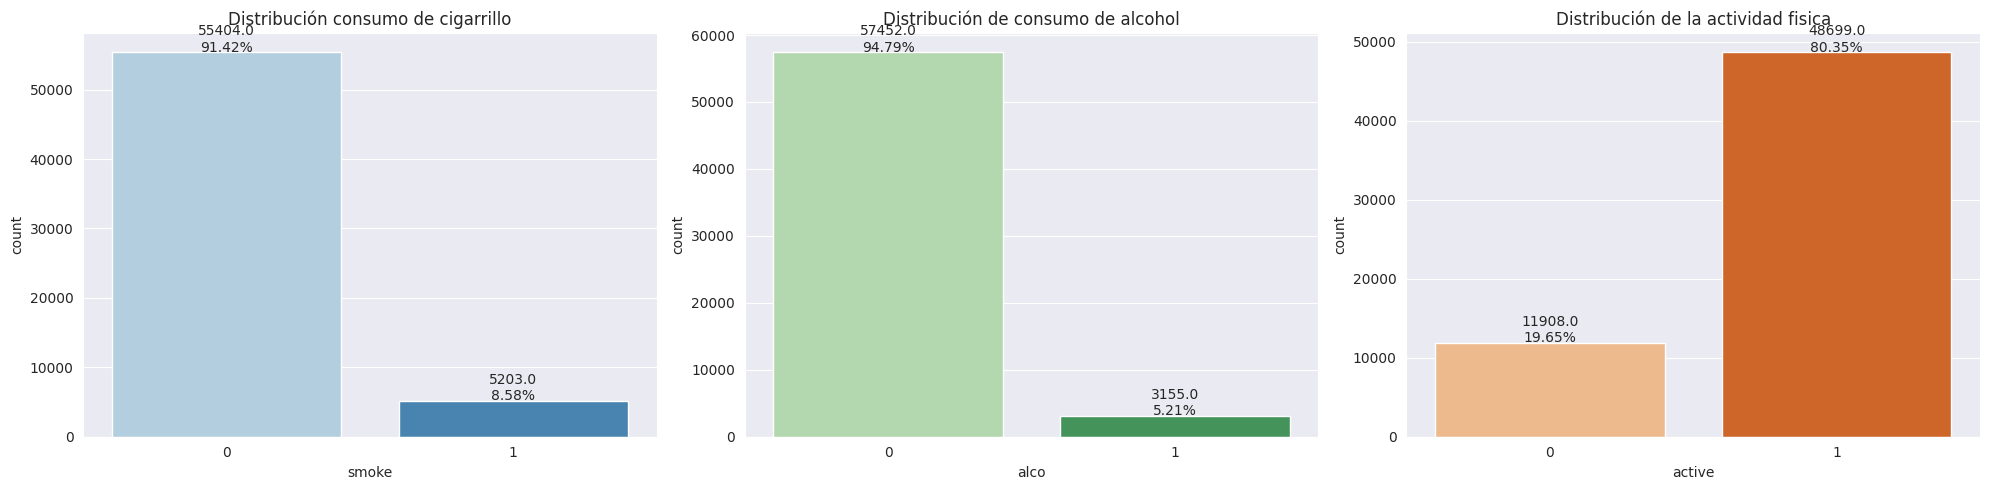

In [39]:
fig, gra = plt.subplots(ncols=3, figsize=(20, 5))

# Gráfico para 'smoke'
sns.countplot(x='smoke', data=salud_df, ax=gra[0],hue="smoke" ,palette='Blues', legend=False)
gra[0].set_title('Distribución consumo de cigarrillo')
funciones.agregar_etiquetas_con_ratio(gra[0], salud_df['smoke'])

# Gráfico para 'alcohol
sns.countplot(x='alco', data=salud_df, ax=gra[1], hue="alco",palette='Greens',legend=False)
gra[1].set_title('Distribución de consumo de alcohol')
funciones.agregar_etiquetas_con_ratio(gra[1], salud_df['alco'])

# Gráfico para active
sns.countplot(x='active', data=salud_df, ax=gra[2], hue="active",palette='Oranges', legend=False)
gra[2].set_title('Distribución de la actividad fisica')
funciones.agregar_etiquetas_con_ratio(gra[2], salud_df['active'])

plt.tight_layout()
plt.show()


* Análisis de Variables de Estilo de Vida:
* Se analizaron las distribuciones de las variables binarias relacionadas con hábitos: 'smoke' (tabaquismo), 'alco' (consumo de alcohol) y 'active' (actividad física).
 - 'smoke': El 91.42% de los pacientes reporta no fumar, mientras que solo un 8.58% indica ser fumador.
 - 'alco': El consumo de alcohol también es bajo, con un 94.79% que no consume y un 5.21% que sí lo hace.
 - 'active': En contraste, la mayoría (80.35%) declara tener una vida físicamente activa, mientras que el 19.65% no realiza actividad física.
* Estas variables muestran una fuerte concentración en las respuestas "saludables", lo cual puede indicar sesgo en los datos o una población con predominancia de buenos hábitos reportados.



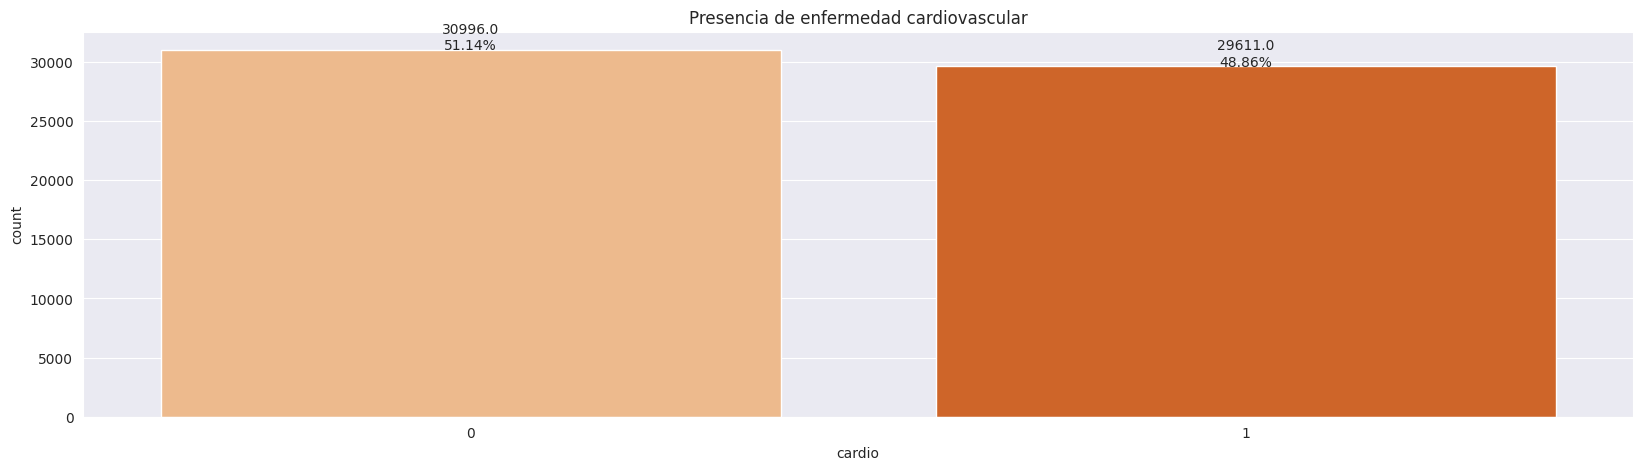

In [40]:
#Distribución de variable objetivo cardio
fig, ax = plt.subplots(ncols=1, figsize=(20, 5))
sns.countplot(x='cardio', data=salud_df, ax=ax, hue="cardio", palette='Oranges', legend=False)
ax.set_title('Presencia de enfermedad cardiovascular')
funciones.agregar_etiquetas_con_ratio(ax, salud_df['cardio'])
plt.show()

* Distribución de la Variable Objetivo ('cardio'):
* Se visualizó la distribución de la variable binaria 'cardio', que indica la presencia (1) o ausencia (0) de enfermedad cardiovascular.
* El conjunto de datos se encuentra prácticamente balanceado, con un 51.14% de casos sin enfermedad y un 48.86% con enfermedad cardiovascular.
* Esta distribución balanceada es favorable para el entrenamiento de modelos de clasificación, ya que reduce el riesgo de sesgo hacia una clase dominante.


### Analisis Bivariado

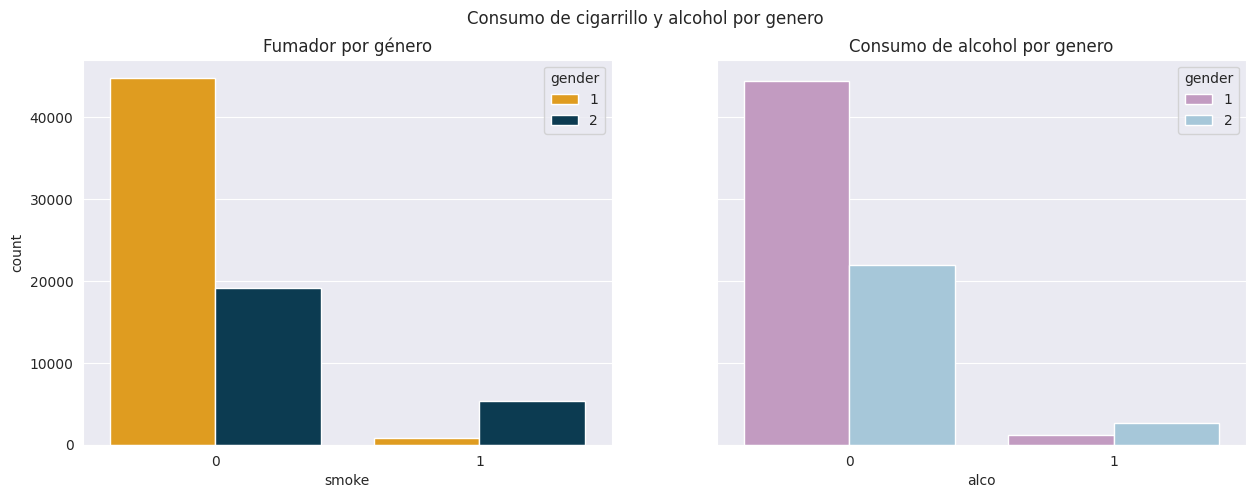

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Consumo de cigarrillo y alcohol por genero')

colors = ['#ffa600', '#003f5c']
sns.countplot(ax=axes[0], x=df.smoke,hue=df.gender,palette=colors)
axes[0].set_title("Fumador por género")

colors = ['#c994c7', '#9ecae1']
sns.countplot(ax=axes[1], x=df.alco,hue=df.gender,palette=colors)
axes[1].set_title("Consumo de alcohol por genero")
plt.show()

* Esta figura compara el consumo de cigarrillo y alcohol según el género.
* El gráfico de la izquierda muestra el número de fumadores (1) y no fumadores (0) diferenciados por género:
  - El color mostaza representa al género 1 (posiblemente femenino) y el azul oscuro al género 2 (posiblemente masculino).
  - Se observa que la mayoría de personas no fuma, siendo más alto el número en el género 1.
  - Entre los fumadores, el género 2 tiene una mayor representación.

*  El gráfico de la derecha muestra el consumo de alcohol (1 = sí, 0 = no) también segmentado por género.
  - El género 1 tiene una mayor proporción de no consumidores de alcohol.
  -  El género 2 presenta una mayor proporción de consumo en comparación con el género 1.

<Figure size 1000x600 with 0 Axes>

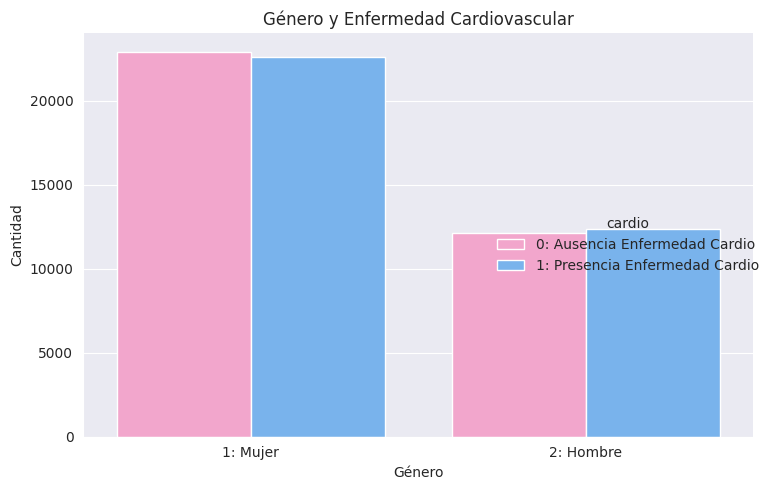

In [42]:
grouped_data = df.groupby(['gender', 'cardio']).size().reset_index(name='count')

# Mapeo de etiquetas
gender_map = {
    1: '1: Mujer',
    2: '2: Hombre',
}

cardio_map = {
    0: '0: Ausencia Enfermedad Cardio',
    1: '1: Presencia Enfermedad Cardio'
}

# Aplicar los mapeos
grouped_data['gender'] = grouped_data['gender'].map(gender_map)
grouped_data['cardio'] = grouped_data['cardio'].map(cardio_map)


colors = ['#ff99cc', '#66b3ff']
plt.figure(figsize=(10, 6))
sns.catplot(x='gender', y='count', hue='cardio', kind='bar', palette=colors, data=grouped_data)

plt.title('Género y Enfermedad Cardiovascular')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

* Esta gráfica muestra la relación entre el género y la presencia de enfermedad cardiovascular.
* Entre las mujeres, la cantidad de personas con y sin enfermedad cardiovascular es bastante similar.
* En el caso de los hombres, también hay una distribución relativamente pareja, aunque ligeramente mayor la cantidad con enfermedad.

<Figure size 1000x600 with 0 Axes>

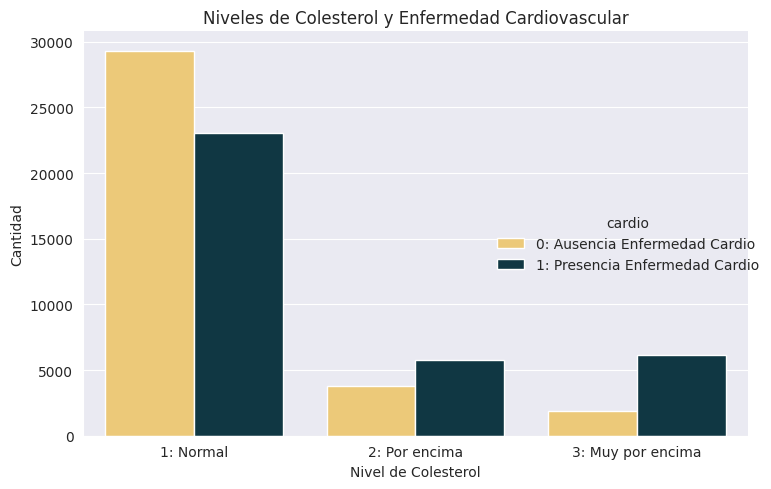

In [43]:
grouped_data = df.groupby(['cholesterol', 'cardio']).size().reset_index(name='count')

# Mapeo de etiquetas
cholesterol_map = {
    1: '1: Normal',
    2: '2: Por encima',
    3: '3: Muy por encima'
}

cardio_map = {
    0: '0: Ausencia Enfermedad Cardio',
    1: '1: Presencia Enfermedad Cardio'
}

# Aplicar los mapeos
grouped_data['cholesterol'] = grouped_data['cholesterol'].map(cholesterol_map)
grouped_data['cardio'] = grouped_data['cardio'].map(cardio_map)


colors =['#ffd166', '#073b4c']
plt.figure(figsize=(10, 6))
sns.catplot(x='cholesterol', y='count', hue='cardio', kind='bar', palette=colors, data=grouped_data)

plt.title('Niveles de Colesterol y Enfermedad Cardiovascular')
plt.xlabel('Nivel de Colesterol')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

* Esta gráfica muestra la relación entre los niveles de colesterol y la presencia de enfermedad cardiovascular.
- La mayoría de las personas tienen colesterol en niveles normales, y dentro de este grupo también hay una cantidad considerable de personas con enfermedad cardiovascular.
- En los niveles 2 y 3 (colesterol elevado y muy elevado), hay más casos con presencia de enfermedad que sin ella.
- Se observa una tendencia clara: a mayor nivel de colesterol, mayor proporción de personas con enfermedad cardiovascular.

<Figure size 1000x600 with 0 Axes>

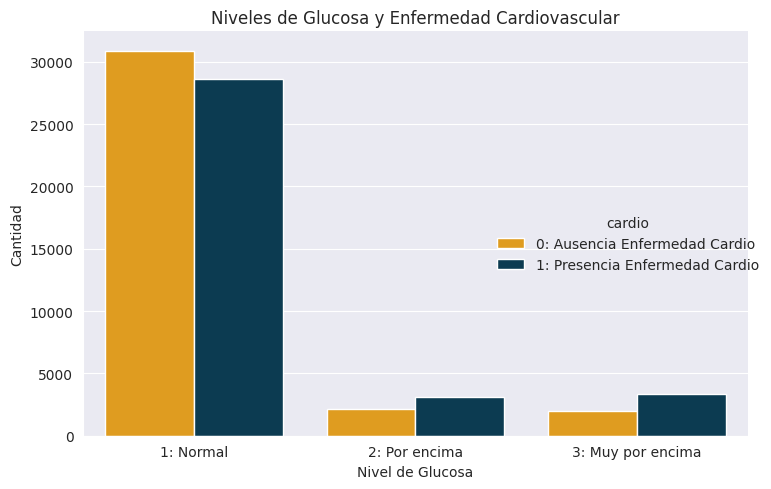

In [44]:
grouped_data = df.groupby(['gluc', 'cardio']).size().reset_index(name='count')

# Mapeo de etiquetas
gluc_map = {
    1: '1: Normal',
    2: '2: Por encima',
    3: '3: Muy por encima'
}

cardio_map = {
    0: '0: Ausencia Enfermedad Cardio',
    1: '1: Presencia Enfermedad Cardio'
}

# Aplicar los mapeos
grouped_data['gluc'] = grouped_data['gluc'].map(gluc_map)
grouped_data['cardio'] = grouped_data['cardio'].map(cardio_map)


colors = ['#ffa600', '#003f5c']
plt.figure(figsize=(10, 6))
sns.catplot(x='gluc', y='count', hue='cardio', kind='bar', palette=colors, data=grouped_data)

plt.title('Niveles de Glucosa y Enfermedad Cardiovascular')
plt.xlabel('Nivel de Glucosa')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

* Esta gráfica analiza la relación entre los niveles de glucosa y la presencia de enfermedad cardiovascular.
- La mayoría de los individuos presentan niveles normales de glucosa, tanto en personas con como sin enfermedad cardiovascular.
- En los niveles 2 y 3 (elevados), se observa una mayor proporción de casos con enfermedad cardiovascular que sin ella.
- Esto sugiere una posible asociación entre niveles elevados de glucosa y la presencia de enfermedad cardíaca.

<Figure size 1000x600 with 0 Axes>

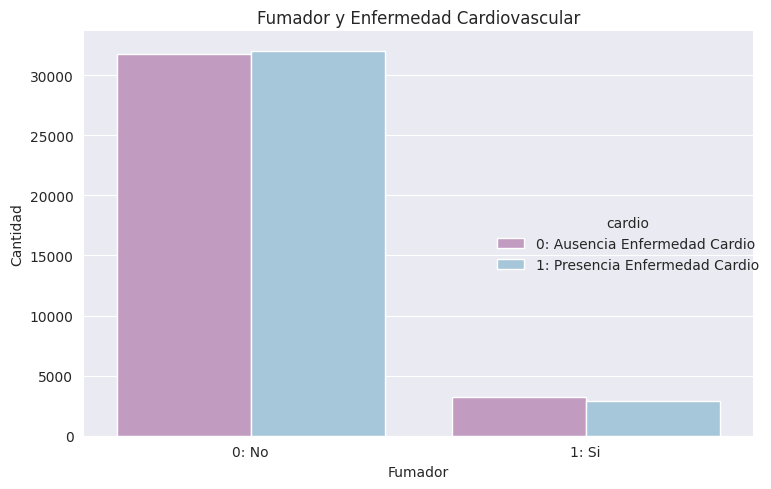

In [45]:
grouped_data = df.groupby(['smoke', 'cardio']).size().reset_index(name='count')

# Mapeo de etiquetas
smoke_map = {
    0: '0: No',
    1: '1: Si',
}

cardio_map = {
    0: '0: Ausencia Enfermedad Cardio',
    1: '1: Presencia Enfermedad Cardio'
}

# Aplicar los mapeos
grouped_data['smoke'] = grouped_data['smoke'].map(smoke_map)
grouped_data['cardio'] = grouped_data['cardio'].map(cardio_map)


colors = ['#c994c7', '#9ecae1']
plt.figure(figsize=(10, 6))
sns.catplot(x='smoke', y='count', hue='cardio', kind='bar', palette=colors, data=grouped_data)

plt.title('Fumador y Enfermedad Cardiovascular')
plt.xlabel('Fumador')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

* Esta gráfica representa la relación entre el hábito de fumar y la presencia de enfermedad cardiovascular.
- La mayoría de las personas no fuman, tanto en los grupos con como sin enfermedad cardiovascular.
- Entre las personas que sí fuman, el número de casos con y sin enfermedad cardiovascular es similar y mucho menor que el de no fumadores.
- Esto sugiere que el tabaquismo no es un factor predominante en esta muestra en relación con la enfermedad cardiovascular, aunque podría estar asociado en conjunto con otros factores de riesgo.

<Figure size 1000x600 with 0 Axes>

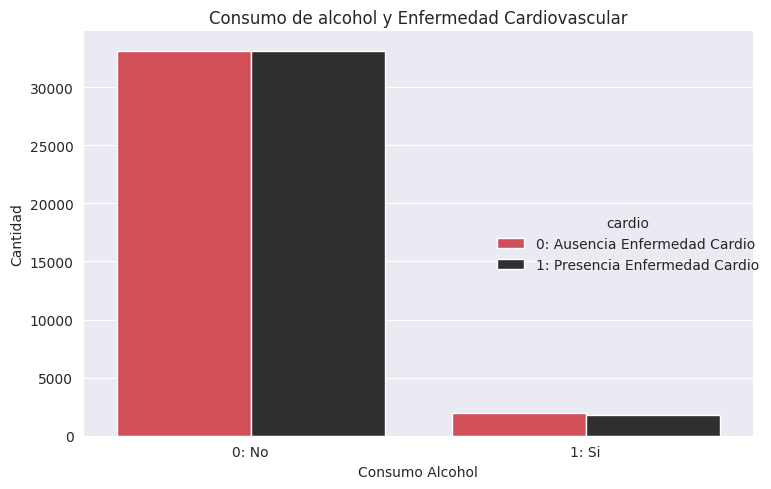

In [46]:
grouped_data = df.groupby(['alco', 'cardio']).size().reset_index(name='count')

# Mapeo de etiquetas
alco_map = {
    0: '0: No',
    1: '1: Si',
}

cardio_map = {
    0: '0: Ausencia Enfermedad Cardio',
    1: '1: Presencia Enfermedad Cardio'
}

# Aplicar los mapeos
grouped_data['alco'] = grouped_data['alco'].map(alco_map)
grouped_data['cardio'] = grouped_data['cardio'].map(cardio_map)


colors =  ['#e63946', '#2f2f2f']
plt.figure(figsize=(10, 6))
sns.catplot(x='alco', y='count', hue='cardio', kind='bar', palette=colors, data=grouped_data)

plt.title('Consumo de alcohol y Enfermedad Cardiovascular')
plt.xlabel('Consumo Alcohol')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

* Esta gráfica analiza la relación entre el consumo de alcohol y la presencia de enfermedad cardiovascular.
- La mayoría de las personas no consumen alcohol, tanto entre quienes tienen como entre quienes no tienen enfermedad cardiovascular.
- El grupo de personas que sí consume alcohol es considerablemente menor.
- No se observa una diferencia significativa en la proporción de enfermedades cardiovasculares entre los que consumen alcohol y los que no.

<Figure size 1000x600 with 0 Axes>

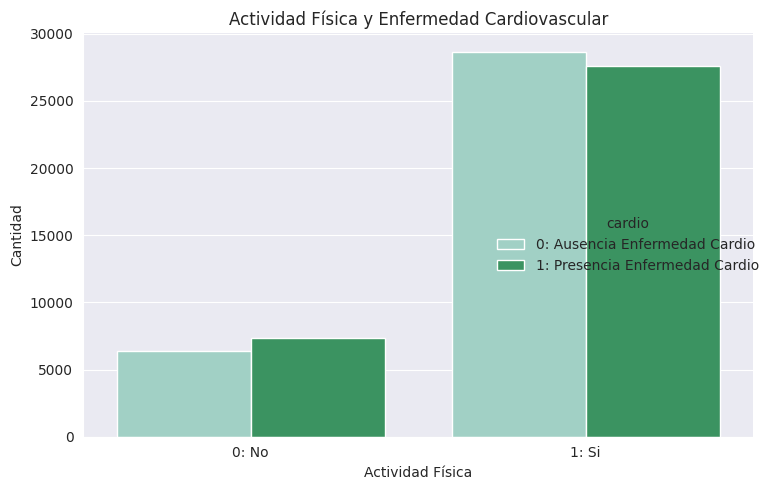

In [47]:
grouped_data = df.groupby(['active', 'cardio']).size().reset_index(name='count')

# Mapeo de etiquetas
active_map = {
    0: '0: No',
    1: '1: Si',
}

cardio_map = {
    0: '0: Ausencia Enfermedad Cardio',
    1: '1: Presencia Enfermedad Cardio'
}

# Aplicar los mapeos
grouped_data['active'] = grouped_data['active'].map(active_map)
grouped_data['cardio'] = grouped_data['cardio'].map(cardio_map)


colors =   ['#99d8c9', '#2ca25f']
plt.figure(figsize=(10, 6))
sns.catplot(x='active', y='count', hue='cardio', kind='bar', palette=colors, data=grouped_data)

plt.title('Actividad Física y Enfermedad Cardiovascular')
plt.xlabel('Actividad Física')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

* Esta gráfica muestra la relación entre la actividad física y la presencia de enfermedad cardiovascular.
- La mayoría de las personas realizan actividad física, independientemente de si presentan enfermedad cardiovascular o no.
- No obstante, también hay una cantidad considerable de personas que no hacen actividad física y presentan enfermedad cardiovascular.
- Aunque hay más casos de enfermedad cardiovascular entre quienes hacen actividad física, esto podría explicarse por el tamaño general del grupo, por lo que no puede afirmarse una relación directa sin un análisis proporcional o estadístico.

In [48]:
saludfinal_df=salud_df.copy()
saludfinal_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60602,53,1,172,70.0,130,90,1,1,0,0,1,1
60603,57,1,165,80.0,150,80,1,1,0,0,1,1
60604,52,2,168,76.0,120,80,1,1,1,0,1,0
60605,61,1,163,72.0,135,80,1,2,0,0,0,1


# Preparación de los Datos

##Escalamiento variables numéricas




In [49]:
salud_escalado=saludfinal_df.copy()

columns_to_scale = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

scaler = MinMaxScaler()

salud_escalado[columns_to_scale] = scaler.fit_transform(salud_escalado[columns_to_scale])
print(salud_escalado.head())

        age gender    height    weight     ap_hi  ap_lo cholesterol gluc  \
0  0.600000      2  0.600000  0.192982  0.153846   0.50           1    1   
1  0.742857      1  0.200000  0.596491  0.615385   0.75           3    1   
2  0.628571      1  0.500000  0.228070  0.461538   0.25           3    1   
3  0.542857      2  0.633333  0.543860  0.769231   1.00           1    1   
4  0.514286      1  0.200000  0.087719  0.000000   0.00           1    1   

  smoke alco active cardio  
0     0    0      1      0  
1     0    0      1      1  
2     0    0      0      1  
3     0    0      1      1  
4     0    0      0      0  


##Codificación variables categóricas

In [50]:
salud_cod=salud_escalado.copy()

In [53]:
data_2 = salud_cod.copy()

# Identificar variables categóricas
categorical_cols = data_2.select_dtypes(include=['object']).columns

# Crear un nuevo DataFrame para almacenar las variables transformadas
transformed_data = pd.DataFrame()

# Transformar variables categóricas con 2 valores usando LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_cols:
    if data_2[col].nunique() == 2:
        # Aplicar LabelEncoder para variables con 2 categorías
        transformed_data[col] = label_encoder.fit_transform(data_2[col])
    else:
        # Aplicar pd.get_dummies para variables con más de 2 categorías
        dummies = pd.get_dummies(data_2[col], prefix=col, drop_first=True)
        # Asegurarse de que las variables dummy sean numéricas (0 y 1)
        dummies = dummies.astype(int)
        transformed_data = pd.concat([transformed_data, dummies], axis=1)

# Añadir columnas numéricas no transformadas
numerical_cols = data_2.select_dtypes(include=['number']).columns
transformed_data = pd.concat([transformed_data, data_2[numerical_cols]], axis=1)

# Reordenar las columnas para asegurarnos de que 'nota_03_binary' esté al final
transformed_data = transformed_data[[col for col in transformed_data.columns if col != 'cardio'] + ['cardio']]

# Mostrar el DataFrame transformado
print("DataFrame transformado:")

salud_cod = transformed_data.copy()
salud_cod.head()

DataFrame transformado:


,gender,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke,alco,active,age,height,weight,ap_hi,ap_lo,cardio
0,1,0,0,0,0,0,0,1,0.600000,0.600000,0.192982,0.153846,0.50,0
1,0,0,1,0,0,0,0,1,0.742857,0.200000,0.596491,0.615385,0.75,1
2,0,0,1,0,0,0,0,0,0.628571,0.500000,0.228070,0.461538,0.25,1
3,1,0,0,0,0,0,0,1,0.542857,0.633333,0.543860,0.769231,1.00,1
4,0,0,0,0,0,0,0,0,0.514286,0.200000,0.087719,0.000000,0.00,0


# Selección de variables





### Método Filtrado

In [51]:
##Metodo Filtrado ANOVA
X_num = salud_cod[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]
y = salud_cod['cardio'].astype(int)

f_values, p_values = f_classif(X_num, y)
pd.DataFrame({'Feature': X_num.columns, 'F-value': f_values, 'p-value': p_values}).sort_values(by='F-value', ascending=False)

,Feature,F-value,p-value
3,ap_hi,13651.223280,0.000000e+00
4,ap_lo,7050.376187,0.000000e+00
0,age,3619.819107,0.000000e+00
2,weight,1611.025482,0.000000e+00
1,height,52.099061,5.338674e-13


In [54]:
X_cat = salud_cod[['cholesterol_2', 'cholesterol_3', 'gluc_2', 'gluc_3', 'smoke', 'alco', 'active', 'gender']]
y = salud_cod['cardio'].astype(int)

chi2_stat, p_values = chi2(X_cat, y)
pd.DataFrame({'Feature': X_cat.columns, 'Chi2': chi2_stat, 'p-value': p_values}).sort_values(by='Chi2', ascending=False)

,Feature,Chi2,p-value
1,cholesterol_3,1972.523403,0.000000e+00
0,cholesterol_2,315.394670,1.459030e-70
3,gluc_3,277.500740,2.631703e-62
2,gluc_2,120.915691,3.987216e-28
4,smoke,29.564283,5.409258e-08
6,active,17.850632,2.389399e-05
5,alco,11.316137,7.683638e-04
7,gender,0.749605,3.866014e-01


De acuerdo con el análisis anterior, el género no es una variable representativa

### Método Lasso

In [55]:
# X: todas las variables excepto la variable objetivo
X = salud_cod.drop(columns='cardio')

# y: variable objetivo binaria
y = salud_cod['cardio'].astype(int)

In [56]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)

LassoCV(cv=5, random_state=42)

In [57]:
# Recuperar las variables seleccionadas (coeficiente distinto de 0)
selected_features = X.columns[(lasso.coef_ != 0)]
print("Variables seleccionadas:", selected_features.tolist())


Variables seleccionadas: ['gender', 'cholesterol_2', 'cholesterol_3', 'gluc_3', 'smoke', 'alco', 'active', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']


<Axes: title={'center': 'Importancia según Lasso'}>

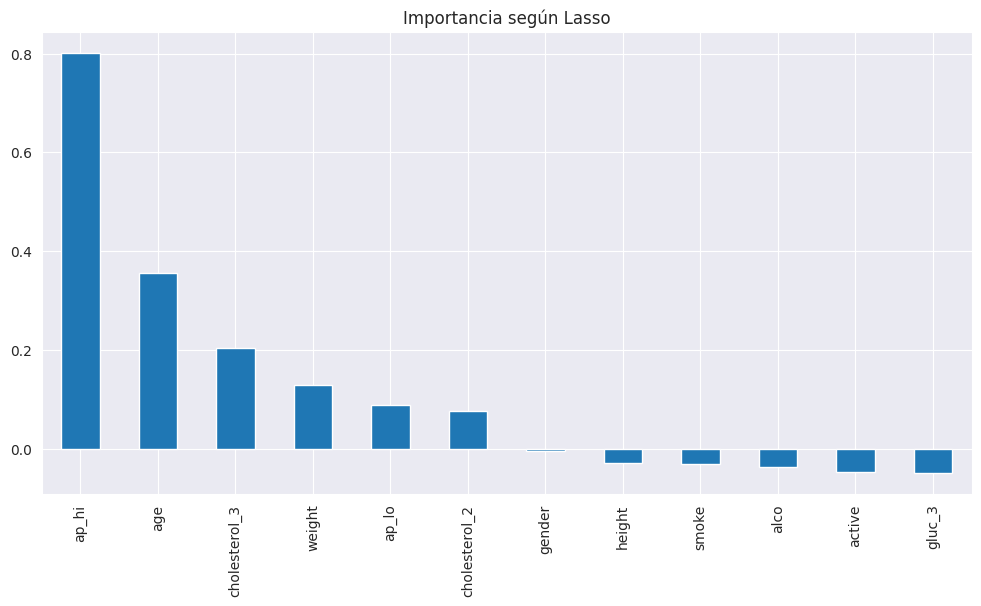

In [58]:

#Ver todos los coeficientes
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
lasso_coef[lasso_coef != 0].sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Importancia según Lasso')

* Resultado del modelo LassoCV:
* Según la regresión Lasso con validación cruzada (LassoCV), las variables con mayor importancia para predecir la presencia de enfermedad cardiovascular son la presión arterial sistólica (ap_hi),la edad (age), el nivel elevado de colesterol (cholesterol_3) y el peso (weight).
* Lasso penaliza y reduce a cero los coeficientes de variables menos relevantes, como el género, el hábito de fumar (smoke), consumo de alcohol (alco), actividad física (active) y la glucosa muy elevada (gluc_3), indicando que estas variables no aportan significativamente al modelo predictivo en este conjunto de datos.

# BD Final

In [59]:
#salud_modelado = salud_cod.drop(columns=['gender'])

salud_modelado =salud_cod.copy()
salud_modelado.head()

,gender,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke,alco,active,age,height,weight,ap_hi,ap_lo,cardio
0,1,0,0,0,0,0,0,1,0.600000,0.600000,0.192982,0.153846,0.50,0
1,0,0,1,0,0,0,0,1,0.742857,0.200000,0.596491,0.615385,0.75,1
2,0,0,1,0,0,0,0,0,0.628571,0.500000,0.228070,0.461538,0.25,1
3,1,0,0,0,0,0,0,1,0.542857,0.633333,0.543860,0.769231,1.00,1
4,0,0,0,0,0,0,0,0,0.514286,0.200000,0.087719,0.000000,0.00,0


In [60]:
import os

# Define la ruta completa a la carpeta 'data' y el nombre del archivo CSV
salida_path = os.path.join("/content/drive/My Drive/cod/analitica_salud/data", "salud_modelado_final.csv")

# Guardar el DataFrame en la ruta especificada
salud_modelado.to_csv(salida_path, index=False)

print(f"Archivo guardado en: {salida_path}")

Archivo guardado en: /content/drive/My Drive/cod/analitica_salud/data/salud_modelado_final.csv
